<a href="https://colab.research.google.com/github/VidhyaMadhavi/EVA/blob/master/Assignment9/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

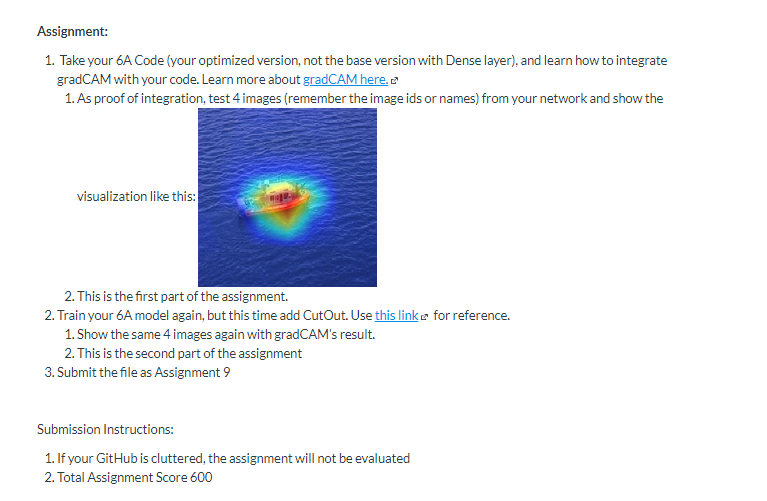

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/EVA3/EVA3-Assignment9')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

assignment6_1.h5	  assignment9.h5	 classification_models.git
assignment_9_epoch100.h5  Assignment9.ipynb	 color_img.jpg
Assignment_9_grad_cam.h5  classification_models  tests


## Training the code for 100 epochs and then save the model.
## Use the model to display the grad cam result

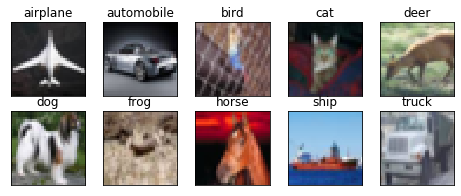

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_laun

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_4 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 96)       

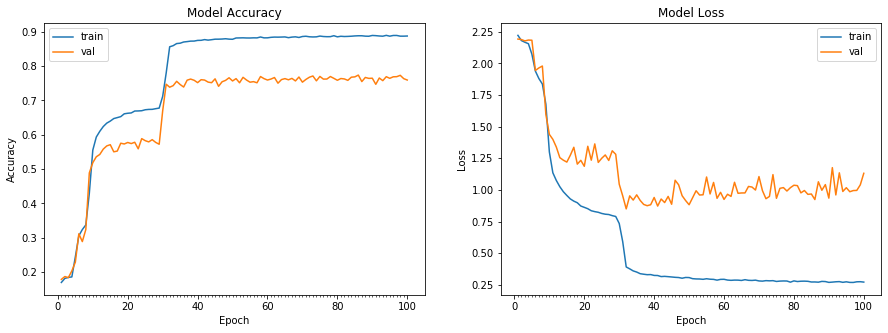

Accuracy on test data is: 75.94


In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils


from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))


class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()


def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)


train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)


# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(Convolution2D(48, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 2, 2))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))
# # Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


#Training
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.save_weights('Assignment_9_grad_cam.h5')

# Grad Cam

In [0]:
# (train_features, train_labels), (test_features, test_labels)

x_test = test_features
def preprocess_input(x, **kwargs):
    return x

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
8
Tensor("strided_slice_33:0", shape=(?,), dtype=float32)
(32, 32, 3)


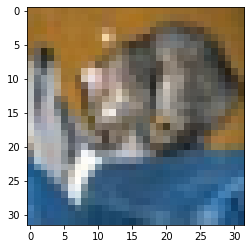

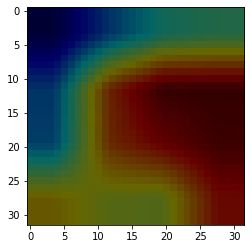

In [0]:
from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', x_test[0].shape)
x_test_preprocess = preprocess(x_test[0])
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_19")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', x_test[0])
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(x_test[0])
plt.show()
plt.imshow( superimposed_img)
plt.show()

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
7
Tensor("strided_slice_59:0", shape=(?,), dtype=float32)
(32, 32, 3)


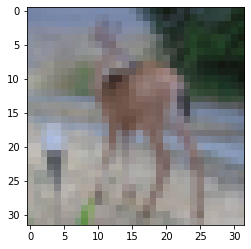

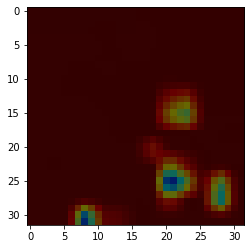

In [0]:
image_file_name = x_test[100]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_17")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(96):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
9
Tensor("strided_slice_65:0", shape=(?,), dtype=float32)
(32, 32, 3)


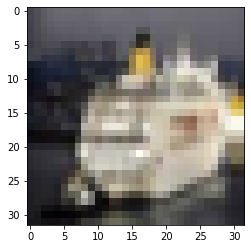

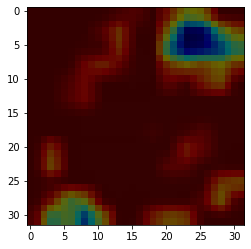

In [0]:
image_file_name = x_test[260]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_17")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(96):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
9
Tensor("strided_slice_71:0", shape=(?,), dtype=float32)
(32, 32, 3)


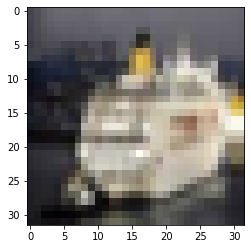

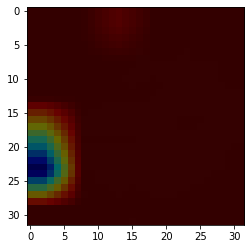

In [0]:
image_file_name = x_test[260]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_18")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
9
Tensor("strided_slice_85:0", shape=(?,), dtype=float32)
(32, 32, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


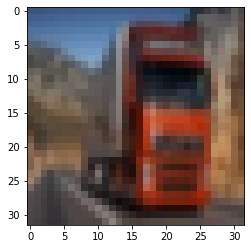

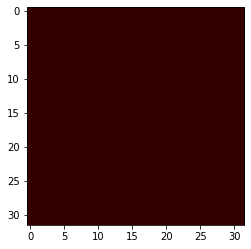

In [0]:
image_file_name = x_test[360]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_17")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(96):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()

# using cutout

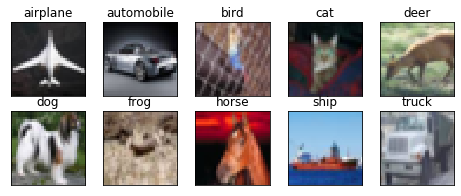

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:114: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:117: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:128: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:132: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:137: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykerne

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_41 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_16 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_42 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:166: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:166: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 28s 73ms/step - loss: 2.0732 - acc: 0.2729 - val_loss: 2.0950 - val_acc: 0.2987
Epoch 2/100
390/390 [==============================] - 25s 65ms/step - loss: 1.6370 - acc: 0.4380 - val_loss: 1.5663 - val_acc: 0.4576
Epoch 3/100
390/390 [==============================] - 25s 63ms/step - loss: 1.4763 - acc: 0.4910 - val_loss: 1.4773 - val_acc: 0.4782
Epoch 4/100
390/390 [==============================] - 25s 64ms/step - loss: 1.3867 - acc: 0.5206 - val_loss: 1.4394 - val_acc: 0.5025
Epoch 5/100
390/390 [==============================] - 25s 63ms/step - loss: 1.3240 - acc: 0.5402 - val_loss: 1.3104 - val_acc: 0.5458
Epoch 6/100
390/390 [==============================] - 25s 64ms/step - loss: 1.2722 - acc: 0.5591 - val_loss: 1.2590 - val_acc: 0.5688
Epoch 7/100
390/390 [==============================] - 25s 64ms/step - loss: 1.2314 - acc: 0.5713 - val_loss: 1.1905 - val_acc: 0.5810
Epoch 8/100
390/390 [==============================] - 

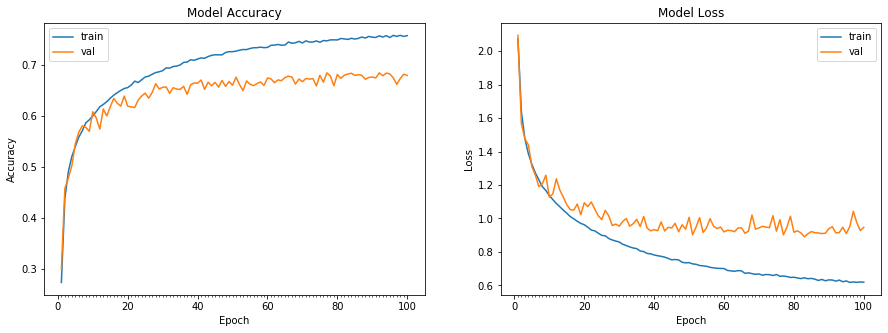

Accuracy on test data is: 68.00


In [0]:

# random_eraser
import numpy as np
import keras




def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

# random_eraser


from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import optimizers


from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))


class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()


def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)


train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)


# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(Convolution2D(48, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 2, 2))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))
# # Compile the model
model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


#Training
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False ,preprocessing_function=get_random_eraser(v_l=0, v_h=1))


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.save_weights('Assignment9_cutout.h5')

# Grad cam with cutout model

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
0
Tensor("strided_slice_15:0", shape=(?,), dtype=float32)
(32, 32, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


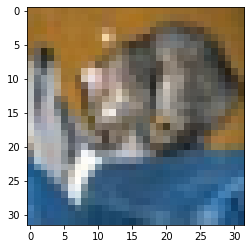

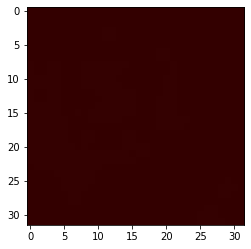

In [0]:
x_test = test_features
def preprocess_input(x, **kwargs):
    return x



from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', x_test[0].shape)
x_test_preprocess = preprocess(x_test[0])
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_40")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', x_test[0])
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(x_test[0])
plt.show()
plt.imshow( superimposed_img)
plt.show()


x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
8
Tensor("strided_slice_17:0", shape=(?,), dtype=float32)
(32, 32, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


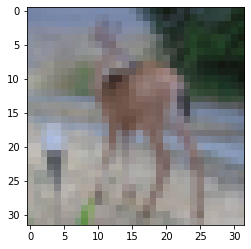

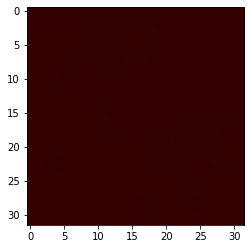

In [0]:
image_file_name = x_test[100]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_40")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(96):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()





x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
8
Tensor("strided_slice_19:0", shape=(?,), dtype=float32)
(32, 32, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


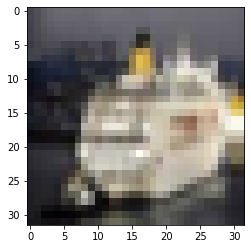

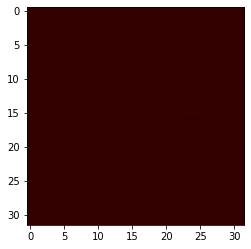

In [0]:
image_file_name = x_test[260]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_40")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(96):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
8
Tensor("strided_slice_21:0", shape=(?,), dtype=float32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


(32, 32, 3)


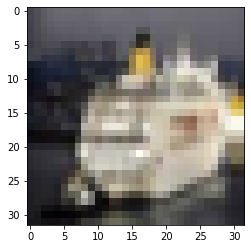

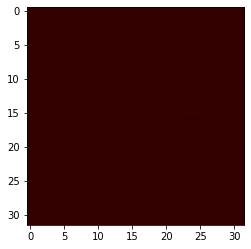

In [0]:
image_file_name = x_test[260]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_40")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
9
Tensor("strided_slice_23:0", shape=(?,), dtype=float32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


(32, 32, 3)


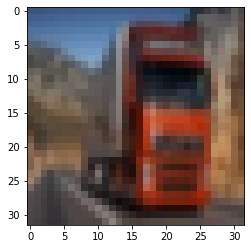

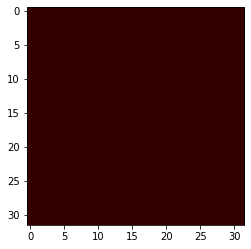

In [0]:
image_file_name = x_test[360]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_40")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(96):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()

## Improving the model further so the prediction quality is good

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_41 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_16 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_42 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 48s 124ms/step - loss: 1.3026 - acc: 0.5619 - val_loss: 0.9585 - val_acc: 0.6644
Epoch 2/100
390/390 [==============================] - 44s 112ms/step - loss: 1.2197 - acc: 0.5747 - val_loss: 0.9924 - val_acc: 0.6496
Epoch 3/100
390/390 [==============================] - 42s 109ms/step - loss: 1.1945 - acc: 0.5828 - val_loss: 1.0097 - val_acc: 0.6508
Epoch 4/100
390/390 [==============================] - 42s 108ms/step - loss: 1.1759 - acc: 0.5881 - val_loss: 0.9207 - val_acc: 0.6728
Epoch 5/100
390/390 [==============================] - 46s 117ms/step - loss: 1.1563 - acc: 0.5932 - val_loss: 0.9801 - val_acc: 0.6521
Epoch 6/100
390/390 [==============================] - 43s 111ms/step - loss: 1.1535 - acc: 0.5958 - val_loss: 1.0089 - val_acc: 0.6504
Epoch 7/100
390/390 [==============================] - 43s 109ms/step - loss: 1.1392 - acc: 0.5982 - val_loss: 0.9178 - val_acc: 0.6685
Epoch 8/100
390/390 [===========================

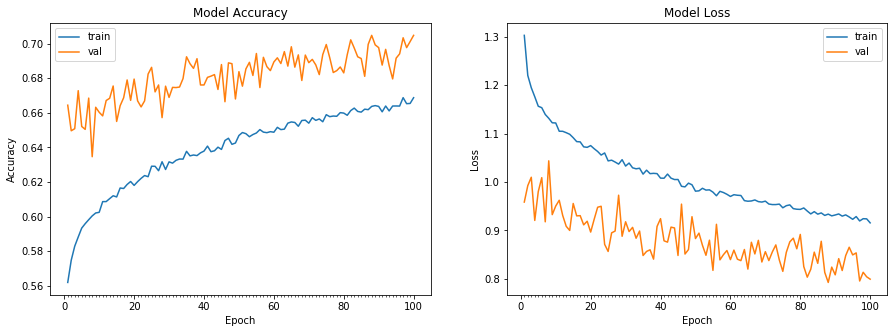

Accuracy on test data is: 70.48


OSError: ignored

In [0]:
model.load_weights('Assignment9_cutout.h5')
model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


#Training
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.5, horizontal_flip=True,rotation_range = 20, preprocessing_function=get_random_eraser(v_l=0, v_h=1))


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
model.load_weights('Assignment9_200_cutout.h5')

In [0]:
model.save_weights('Assignment9_cutout_200.h5')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_41 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_16 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_42 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  del sys.path[0]


Epoch 1/100
390/390 [==============================] - 49s 125ms/step - loss: 0.9191 - acc: 0.6660 - val_loss: 0.8015 - val_acc: 0.7022
Epoch 2/100
390/390 [==============================] - 44s 112ms/step - loss: 0.9177 - acc: 0.6665 - val_loss: 0.8067 - val_acc: 0.7004
Epoch 3/100
390/390 [==============================] - 43s 109ms/step - loss: 0.9196 - acc: 0.6669 - val_loss: 0.8379 - val_acc: 0.6967
Epoch 4/100
390/390 [==============================] - 43s 109ms/step - loss: 0.9168 - acc: 0.6671 - val_loss: 0.8240 - val_acc: 0.6922
Epoch 5/100
390/390 [==============================] - 45s 116ms/step - loss: 0.9148 - acc: 0.6669 - val_loss: 0.8302 - val_acc: 0.6939
Epoch 6/100
390/390 [==============================] - 44s 113ms/step - loss: 0.9121 - acc: 0.6686 - val_loss: 0.7982 - val_acc: 0.7027
Epoch 7/100
390/390 [==============================] - 43s 110ms/step - loss: 0.9113 - acc: 0.6705 - val_loss: 0.8120 - val_acc: 0.7004
Epoch 8/100
390/390 [===========================

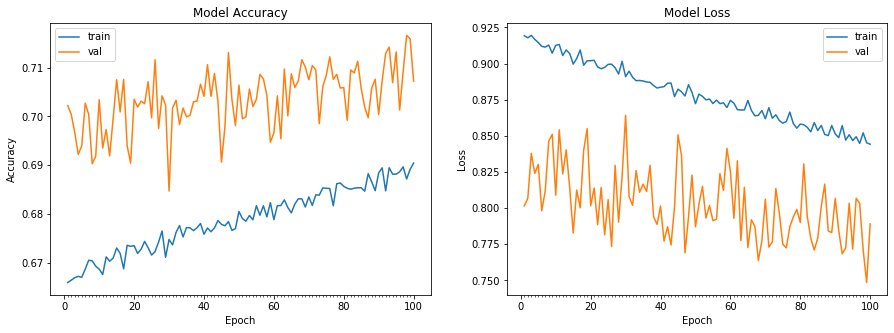

Accuracy on test data is: 70.72


OSError: ignored

In [0]:
model.load_weights('Assignment9_cutout_200.h5')
model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
#Training
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(zoom_range=0.5, horizontal_flip=True,rotation_range = 20, preprocessing_function=get_random_eraser(v_l=0, v_h=1))
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
model.load_weights('Assignment9_cutout_300.h5')

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
3
Tensor("strided_slice_25:0", shape=(?,), dtype=float32)
(32, 32, 3)


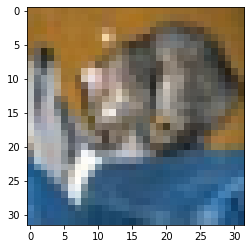

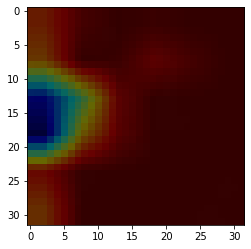

In [0]:
x_test = test_features
def preprocess_input(x, **kwargs):
    return x



from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', x_test[0].shape)
x_test_preprocess = preprocess(x_test[0])
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_40")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', x_test[0])
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(x_test[0])
plt.show()
plt.imshow( superimposed_img)
plt.show()

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
3
Tensor("strided_slice_43:0", shape=(?,), dtype=float32)
(32, 32, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


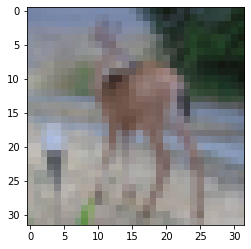

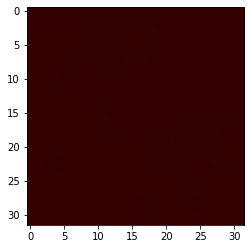

In [0]:
image_file_name = x_test[100]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_40")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()


x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
3
Tensor("strided_slice_45:0", shape=(?,), dtype=float32)
(32, 32, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


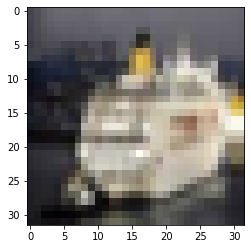

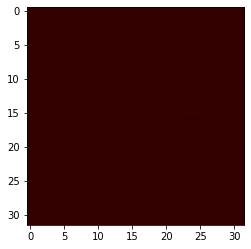

In [0]:
image_file_name = x_test[260]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_40")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
3
Tensor("strided_slice_47:0", shape=(?,), dtype=float32)
(32, 32, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


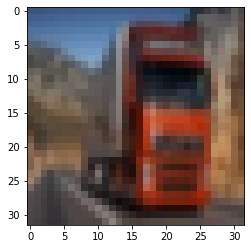

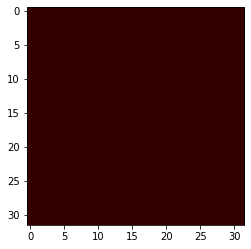

In [0]:
image_file_name = x_test[360]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_40")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()